# 앙상블(Ensemble)

<strong>여러 개의 분류 모델을 조합해서 더 나은 성능을 내는 방법이다.</strong>

최근접 이웃, 서포트 백터 머신, 의사결정 트리, 나이브 베이즈 분류 모델을 실습했는데 지금까지 실습한 여러 분류 모델을 조합해서 단일 모델모다 더 좋은 성능을 낸다.

***
+ 배깅(bagging)

    어원은 부트스트랩(bootstrap)과 어그리게이팅(aggregating, 집계)에서 왔고 상당히 연주하기 힘든 바이올린 연주곡을 두세명의 초급 바이올린 연주자가 나누어 연주함으로써 한 명의 중급 바이올린 연주자가 연주하는 것 보다 나은 연주를 할 수 있는 것에 비유할 수 있다.

    중금 바이올린 연주자는 나름 잘 학습했지만 학습 데이터에 과대적합된 의사결정 트리라 볼 수 있다. 의사결정 트리의 단점은 쉽게 과적합된다는 것인데 배깅은 과대적합이 쉬운 모델에 상당히 적합한 앙상블이다.


+ 부스팅(Boosting)

    여러 개의 분류기를 만들어 투표를 통해 예측값을 결정한다는 측면에서는 배깅과 동일하다.

    배깅은 서로 다른 알고리즘에 기반한 여러  분류기를 병렬적으로 학습하는 반면에 부스팅은 동이한 알고리즘의 분류기를 순차적으로 학습해서 여러 개의 분류기를 만든 후 테스트할 때 가중 투표를 통해 예측값을 결정한다.

***
+ 랜덤 포레스트(Random Forest)

    여러 의사결정 트리를 배깅을 적용해서 예측을 실행하는 모델이다.
    
    배깅이 모든 분류 모델에서 적용 가능하지만 특히 과대적합되기 쉬운 의사경정 트리에 적용하면 확실히 과대적합을 줄여 성능이 높아지는 혜택을 보기 때문에 배깅은 많은 의사결정 트리 모델의 개선으 이뤘고  여러 개의 나무들이 모여있다는 개념애서 랜덤 포레스트라는 이름이 생겼다.

    의사결정 트리에서는 최적의 특징으로 트리를 분기하는 반면 랭덤 포르스트는 각 노드에 주어진 데이터를 샘플링해서 일부 데이터를 제와한 채 최적의 특징을 찾아 트리를 분기한다. 이러한 과정에서 램덤 포레스트는 또 한 번 모델의 편향을 증갓시켜서 과대적합의 위험을 감소시킨다.


## 1. Random Forest : MNIST 데이터셋을 통한 모델 비교

MNIST 손글씨 데이터셋으로 랜덤 포레스트 모델과 의사결정 트리 모델을 동일하게 학습시켜 두 모델의 성능 차이를 시각화해 비교한다.

### 1.0.  환경 설정

In [1]:
# MNIST 손글씨 데이터셋을 사용하기 위해 import 시킨다. 
from sklearn import datasets

# 의사결정 트리 사용을 위한
from sklearn import tree

# 랜덤 포레스트 분류기 사용을 위한
from sklearn.ensemble import RandomForestClassifier

# 교차 검증을 위한 
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 1.1.  MNIST 손글씨 데이터 불러오기

In [2]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
features, labels

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [3]:
# features[0].shape # (64, )
features[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### 1.2. 교차 검증

사이킷런의 cross_val_score() 함수는 데이터를 k개로 나누어 k번 정확도를 검증하는 k-fold 교차 검증을 수행한다.

cross_val_score(model, X, y, scoring=None, cv=None)

    model : 회귀 분석 모형
    X : 독립 변수 데이터 -> 학습 데이터
    y : 종속 변수 데잍터 -> 결과
    scoring : 성능 검증에 사용할 매개 변수에 원하는 평가 지표를 지정한다. 
        분류일 경우 정확도를 의미하는 'accuracy'이다.
    cv : 교차 검증 생성기 객체 또는 숫자
        None이면 k-Fold(3), 숫자 k이면 k-Fold(k)이다.

#### MNIST 데이터에 대한 랜덤 포레스트와 의사결정 트리의 검증 정확도를 계산하는 함수

In [4]:
def cross_validation(classifier, features, labels):
    cv_scores = []
    
    for i in range(10):
        scores = cross_val_score(classifier, features, labels, 
                                 scoring='accuracy', cv=10)
        # print(scores)
        cv_scores.append(scores.mean())
    
    return cv_scores

#### 의사결정 트리의 MNIST 손글씨 검증 정확도를 계산한다.

In [5]:
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)
# dt_cv_scores

for i in range(len(dt_cv_scores)):
    print('{0:2d}. {1:7.5f}'.format(i+1, dt_cv_scores[i]))


 1. 0.82748
 2. 0.82802
 3. 0.83303
 4. 0.81855
 5. 0.82527
 6. 0.83357
 7. 0.83694
 8. 0.82970
 9. 0.82858
10. 0.82248


#### 랜덤 포레스트의 MNIST 손글씨 검증 정확도를 계산한다.

In [6]:
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)
# rf_cv_scores

for i in range(len(rf_cv_scores)):
    print('{0:2d}. {1:7.5f}'.format(i+1, rf_cv_scores[i]))


 1. 0.95603
 2. 0.94880
 3. 0.94602
 4. 0.95102
 5. 0.95047
 6. 0.94656
 7. 0.95157
 8. 0.95380
 9. 0.95437
10. 0.95101


### 1.3. 의사결정 트리와 랜덤 포레스트 정확도 시각화

예전에 사용하던 방법

cv_list = [['decision_tree', dt_cv_scores], ['random_forest', rf_cv_scores]]

리스트를 데이터프레임으로 만들어주는 from_item() 메소드가 없어지고 <strong>from_dict()</strong> 메소드가 사용된다.

df = pd.DataFrame.from_item(cv_list)

In [7]:
# from_dict() 메소드는 딕셔너리를 데이터프레임으로 변경하려 할 경우 사용한다.
cv_dict = {'Decision Tree':dt_cv_scores, 'Random Forest':rf_cv_scores}
df = pd.DataFrame.from_dict(cv_dict) # df = pd.DataFrame(cv_dict) 와 같음
df

,Decision Tree,Random Forest
0,0.827480,0.956034
1,0.828017,0.948799
2,0.833029,0.946021
3,0.818554,0.951018
4,0.825270,0.950469
5,0.833572,0.946564
6,0.836943,0.951567
7,0.829696,0.953799
8,0.828575,0.954370
9,0.822480,0.951015


<AxesSubplot:>

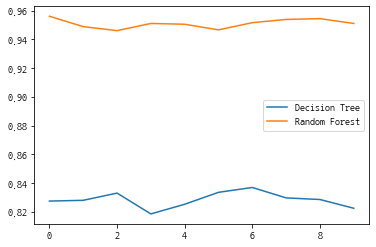

In [8]:
df.plot()

정확도

In [9]:
print('의사결정 트리 : {}'.format(np.mean(dt_cv_scores)))
print('랜덤포레스트 : {}'.format(np.mean(rf_cv_scores)))

의사결정 트리 : 0.8283615766604593
랜덤포레스트 : 0.950965549348231


> 앙상블을 사용하는 것이 더 좋다.

## 2. Voting : MNIST 데이터셋을 통한 예측

MNIST 손글씨 데이터셋을 사용해 단일 모델들을 앙상블해서 투표룰 통해 예측해본다.

### 2.0. 환경 설정

In [20]:
# MNIST 손글씨 데이터셋을 사용하기 위해 import한다.
from sklearn import datasets

# kNN 사용을 위한
from sklearn.neighbors import KNeighborsClassifier

# SVM 사용을 위한
from sklearn.svm import SVC

# 의사결정 트리 사용을 위한
from sklearn import tree

# 하드 보팅, 소프트 보팅을 계산한다.
from sklearn.ensemble import VotingClassifier

# 학습, 검증 데이터 분리를 위한
from sklearn.model_selection import train_test_split

# 정확도 계산을 위한
from sklearn.metrics import accuracy_score

# 시각화를 위한
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

### 2.1. 데이터 불러오기

손글씨 데이터를 불러온다.

In [11]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
features, labels

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [12]:
print(features.shape, labels.shape)

(1797, 64) (1797,)


### 2.2. 데이터 나누기 (학습, 테스트)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
print('학습 데이터 갯수 : {}, 테스트 데이터 갯수 : {}'.format(len(x_train), len(x_test)))


학습 데이터 갯수 : 1437, 테스트 데이터 갯수 : 360


### 2.3. 단일 모델의 정확도 측정

앙상블의 정확도를 측정하기 앞서 단일 모델들의 정확도를 kNN, SVM, 의사결정 트리 분류기를 만들어 정확도를 계산한다.

의사결정트리 옵션

    criterion : split 할 특성 선택 알고리즘
        gini : 지니 계수(gini index, 불순도, 집합에 이질적인 것이 얼마나 섞였는가), CART 알고리즘
        entropy : 엔트로피(entropy, 복잡도, 불확실성), ID3 알고리즘
    max_depth : 트리 최대 길이
    max_features : split 할 때 마다 랜덤으로 선택해 그 중 하나를 split 하는데 사용
    max_leaf_nodes : 최대 몇 개 leaf 노드가 만들어 질 때 까지 split 할 것인가, 작을수록 가지치기
    min_samples_split : 자식 노드가 가지기 위한 최소한의 데이터 개수
    min_samples_leaf : 리프 노드의 최소 데이터 개수

In [14]:
# dtree = tree.DecisionTreeClassifier()
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=8, max_features=32, random_state=35)
dtree = dtree.fit(x_train, y_train)
dtree_predicted = dtree.predict(x_test)

# n_neighbors : kNN 모델에서 사용할 이웃의 개수를 지정한다.
knn = KNeighborsClassifier(n_neighbors=299).fit(x_train, y_train)
knn_predicted = knn.predict(x_test)

# probability : 확률 추정치를 사용할 지 여부를 지정한다. fit() 메소드를 호출하기 전에 저장해야 하며 실행 속도가 느려진다.
svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35).fit(x_train, y_train)
svm_predicted = svm.predict(x_test)

# 모델 예측 정확도를 출력한다.
print('dtree 정확도: {}'.format(accuracy_score(y_test,dtree_predicted)))
print(' knn  정확도: {}'.format(accuracy_score(y_test,knn_predicted)))
print(' svm  정확도: {}'.format(accuracy_score(y_test,svm_predicted)))


dtree 정확도: 0.8138888888888889
 knn  정확도: 0.8333333333333334
 svm  정확도: 0.9305555555555556


확률 합계

In [15]:
svm_proba = svm.predict_proba(x_test)

# 테스트 데이터 개수
print(len(svm_proba))

# print(svm_proba)
print(svm_proba[0])

total = 0.0
for i in svm_proba[0]:
    total += i
print('확률 합계: {}'.format(total))

360
[0.01262306 0.04303277 0.03536139 0.02416179 0.64317926 0.05644144
 0.0195732  0.02592644 0.07986554 0.05983511]
확률 합계: 1.0


### 2.4. 하드 보팅

하드 보팅은 일반적인 투표와 같이 각 분류기의 예측값들을 모아 가장 많은 투표를 받은 예측값으로 최종 결론을 내리는 방식이다.

In [16]:
voting_clf = VotingClassifier(estimators=[('decision_tree', dtree), ('knn',knn),('svm',svm)],
                             weights=[1,1,1], voting='hard').fit(x_train, y_train)

hard_voting_predicted = voting_clf.predict(x_test)

print('hard voting 정확도: {}'.format(accuracy_score(y_test,hard_voting_predicted)))


hard voting 정확도: 0.925


### 2.5. 소프트 보팅

In [17]:
voting_clf = VotingClassifier(estimators=[('decision_tree', dtree), ('knn',knn),('svm',svm)],
                             weights=[1,1,1], voting='soft').fit(x_train, y_train)

soft_voting_predicted = voting_clf.predict(x_test)

print('soft voting 정확도: {}'.format(accuracy_score(y_test,soft_voting_predicted)))


soft voting 정확도: 0.8861111111111111


### 2.6. 단일 모델과 앙상블 모델의 정확도 비교 시각화

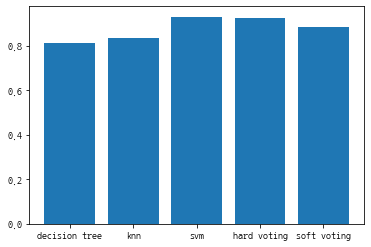

In [21]:
x = np.arange(5)
plt.bar(x, height=[accuracy_score(y_test, dtree_predicted),
                  accuracy_score(y_test, knn_predicted),
                  accuracy_score(y_test, svm_predicted),
                  accuracy_score(y_test, hard_voting_predicted),
                  accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree', 'knn', 'svm', 'hard voting', 'soft voting'])
plt.show()